This notebook investigates pre-burst and non-burst spacial spike windows of size 5, 10, 50, 100, and 500:

* Calculates mean and standard deviation of the areas of the bounding boxes enclosing pre-burst and non-burst spike coordinates.
* Plots a histogram of the areas
* Plots scatter plots of the spike coordinates

Author: Mariia Lundvall (lundvm@uw.edu)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from random import randint
from tqdm import tqdm_notebook as tqdm

In [2]:
def get_window_size(filename):
    """
    Extracts the window size from the filename. The filename must be in a form: typeofdata_window.csv, e.g. temp_5.csv or
    space_100.csv
    
    Args:
        filename(str): the name the file
    
    Returns:
        int: window size
    """
    
    if filename[-8] =='_':
        return int(filename[-7:-4])
    elif filename[-6] == '_':
        return int(filename[-5])
    else:
        return int(filename[-6:-4])
    
    return None

In [3]:
def prepare_data(filename):
    """
    Prepares data for plotting. Reads in a file with the spacial data into a dataframe, removes the labels, and creates 
    two 2d arrays (pre-bursts and non-bursts) for plotting.
    
    Args:
        filename(str): the name of the file to process

    Returns:
        pre_bursts(2d numpy array): array with the pre-burst data
        non_bursts(2d numpy array): array with the non-burst data
    """
    window_size = get_window_size(filename)*2

    data = pd.read_csv(filename, header=None, dtype='int')
    pre_bursts = data[data[window_size] == 1].drop(window_size, axis=1).values
    non_bursts = data[data[window_size] == 0].drop(window_size, axis=1).values
    
    return pre_bursts, non_bursts

In [4]:
def plot_scatter(data, window_size, plot_title):
    """
    Creates a scatter plot of the given data. All examples are plotted on the same figure.
    
    Args:
        data(2d numpy array): array with the data to plot
        window_size(int): window size
        plot(title): plot title
    
    Returns:
        none
    """
    
    plt.figure(figsize=(10,10))
    plt.yticks(np.arange(0, 100, 10))
    plt.xticks(np.arange(0, 100, 10))
    plt.axis([0, 100, 0, 100])
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    plt.title(plot_title)
    for i in tqdm(range(data.shape[0])):
        t = data[i].reshape(window_size,2)
        plt.scatter(t[:, 0], t[:, 1], s=1, color=[0, 0, 0])
    
    plt.show()

In [5]:
def plot_single_scatter(data, window_size, plot_title, s=1):
    """
    Creates a scatter plot of one example from the given data.
    
    Args:
        data(2d numpy array): array with the data to plot
        window_size(int): window size
        plot(title): plot title
    
    Returns:
        none
    """
    
    plt.figure(figsize=(10,10))
    plt.yticks(np.arange(0, 100, 10))
    plt.xticks(np.arange(0, 100, 10))
    plt.axis([0, 100, 0, 100])
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    plt.title(plot_title)
    t = data[randint(0, window_size)].reshape(window_size,2)
    plt.scatter(t[:, 0], t[:, 1], s=s, color=[0, 0, 0])
    
    plt.show()

In [6]:
def bounding_box_area(data, window_size):
    """
    Calculate the area of a bounding box enclosing spike coordinates.
    
    Args:
        data(1d numpy array): array containg x and y coordinates of spikes
        window_size(int): spike window size
    
    Returns:
        area(float): the area of the bounding box
    """
    data = data.reshape(window_size, 2)
    area = (np.max(data[:, 0]) - np.min(data[:, 0]))*(np.max(data[:, 1]) - np.min(data[:, 1]))
    
    return area

In [7]:
def area_mean_std(pre_bursts, non_bursts, window_size):
    """
    Calculates mean and standard deviation of the areas of bounding boxes enclosing spike coordinates.
    
    Args:
        pre_bursts(2d numpy array): array containing pre-burst data
        non_bursts(2d numpy array): array containing non_burst data
        window_size(int): window size
    
    Returns:
        nb_mean(float): mean of non-burst areas
        nb_std(float): standard deviation of non-burst areas
        pb_mean(float): mean of pre-burst areas
        pb_std(float): standard deviation of pre-burst areas
    """    
    
    pb_areas = []
    nb_areas = []
    
    for i in range(pre_bursts.shape[0]):
        pb_areas.append(bounding_box_area(pre_bursts[i], window_size))
    pb_areas = np.array(pb_areas)
    
    for i in range(non_bursts.shape[0]):
        nb_areas.append(bounding_box_area(non_bursts[i], window_size))
    nb_areas = np.array(nb_areas)

    nb_mean = np.mean(nb_areas)
    nb_std = np.std(nb_areas)
    pb_mean = np.mean(pb_areas)
    pb_std = np.std(pb_areas)
    
    return nb_mean, nb_std, pb_mean, pb_std

In [8]:
def plot_area_histogram(pre_bursts, non_bursts, window_size):
    """
    Plots a histogram of the areas of bounding boxes enclosing spike coordinates.
    
    Args:
        pre_bursts(2d numpy array): array containing pre-burst data
        non_bursts(2d numpy array): array containing non_burst data
        window_size(int): window size
    
    Returns:
        none
    """
    pb_areas = []
    nb_areas = []
    
    for i in range(pre_bursts.shape[0]):
        pb_areas.append(bounding_box_area(pre_bursts[i], window_size))
    
    for i in range(non_bursts.shape[0]):
        nb_areas.append(bounding_box_area(non_bursts[i], window_size))
    
    fig, axs = plt.subplots(2, figsize=(10,15), sharex=True)
    axs[0].hist(pb_areas)
    axs[1].hist(nb_areas)
    axs[0].set_title('Pre-bursts')
    axs[1].set_title('Non-bursts')
    axs[1].set_xlabel('Area')
    axs[0].set_xlabel('Area')
    axs[1].set_ylabel('Count')
    axs[0].set_ylabel('Count')

In [9]:
def plot_starter_neurons():
    """
    Creates a scatter plot of starter neurons.
    
    Args:
        none
    
    Returns:
        none
    """
    neurons = pd.read_csv('neurons.csv')
    x = neurons['xloc'].values[np.where(neurons['Starter_Neuron'].values == 1)]
    y = neurons['yloc'].values[np.where(neurons['Starter_Neuron'].values == 1)]
    plt.figure(figsize=(10,10))
    plt.yticks(np.arange(0, 100, 10))
    plt.xticks(np.arange(0, 100, 10))
    plt.axis([0, 100, 0, 100])
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    plt.scatter(x, y, s=5, color=[0, 0, 0])

    plt.show()

Analyzing spike windows of size 5

Mean and standard deviation of the non-burst spike coordinates bounding box area: 4363.9359489239005, 1764.6760988709796
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 597.6907312049434, 1209.7617693774896


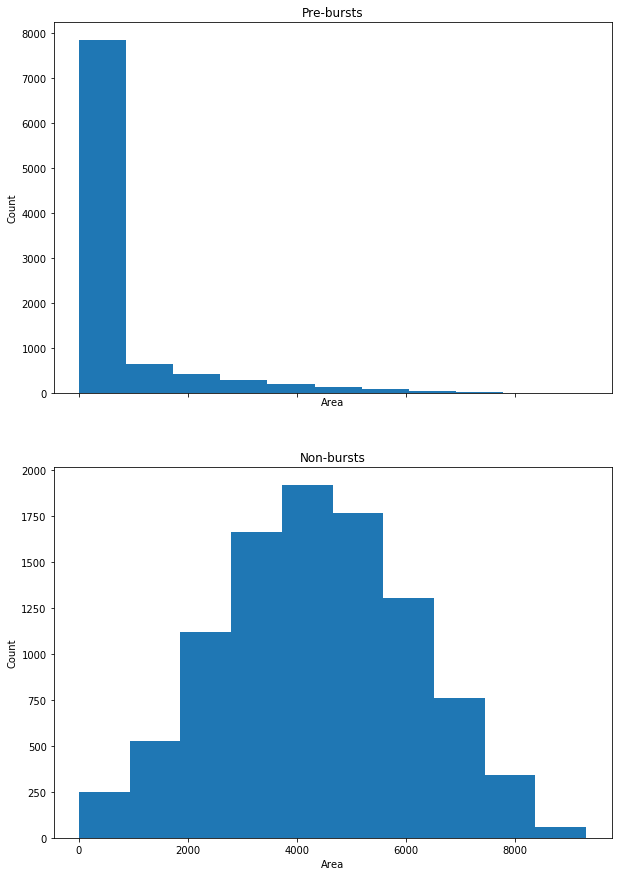

In [10]:
filename = 'train_data/space_5.csv'
window_size = get_window_size(filename)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' + str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' + str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

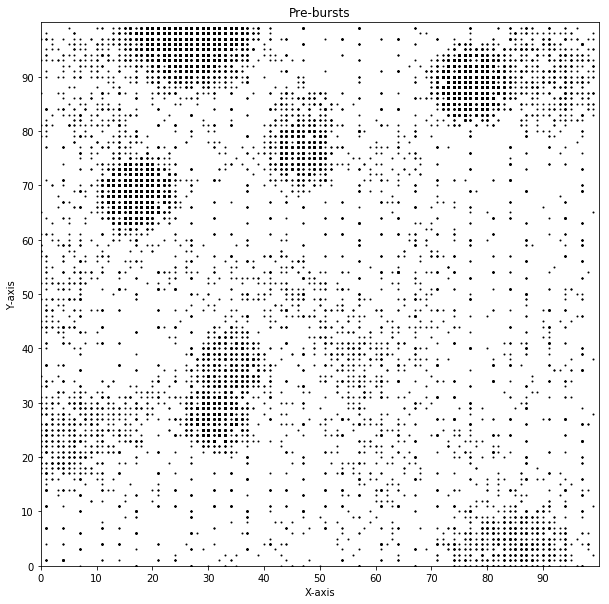

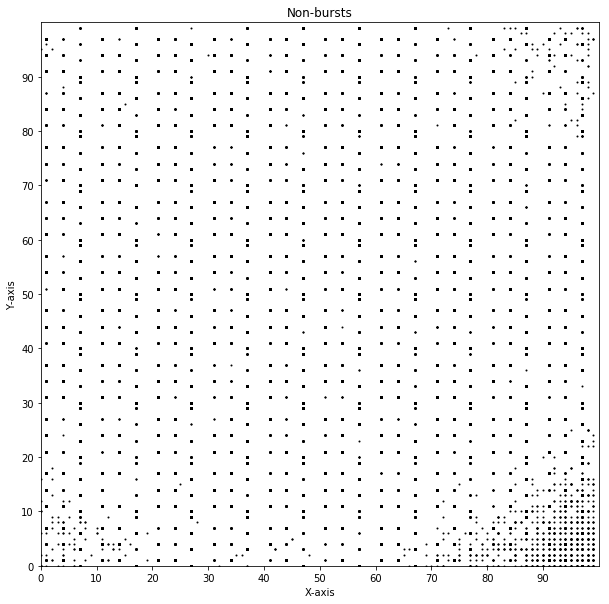

In [11]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

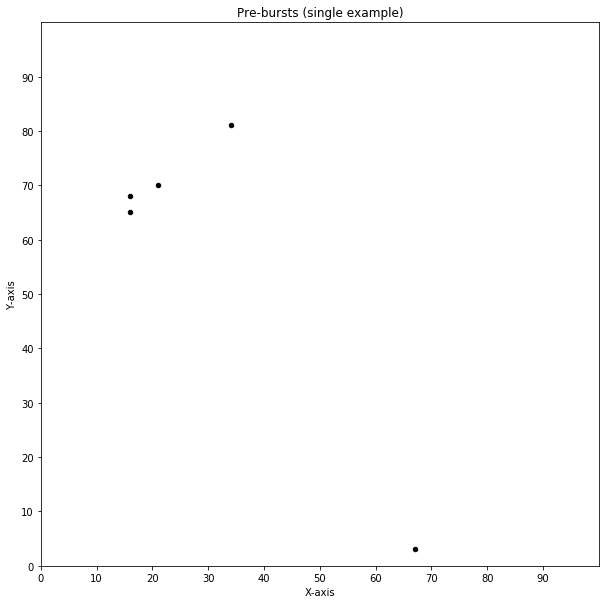

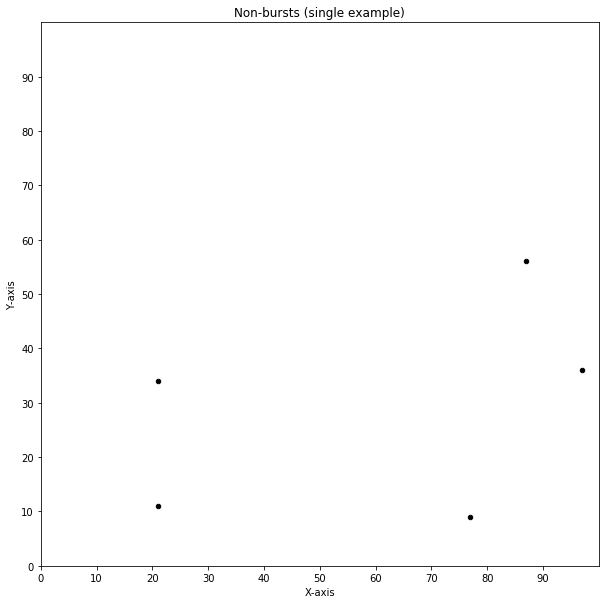

In [12]:
plot_single_scatter(pre_bursts, window_size, 'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size, 'Non-bursts (single example)', s=20)

Analyzing spike windows of size 10

Mean and standard deviation of the non-burst spike coordinates bounding box area: 6547.8100092678405, 1479.2443507025046
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 1207.6939237899073, 1701.4648285991661


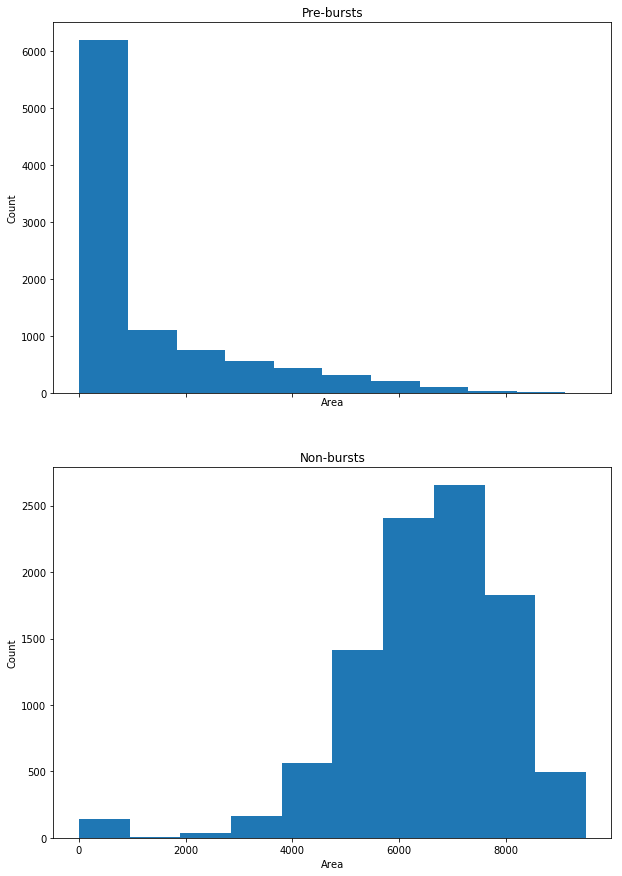

In [13]:
filename = 'train_data/space_10.csv'
window_size = get_window_size(filename)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' + str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' + str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

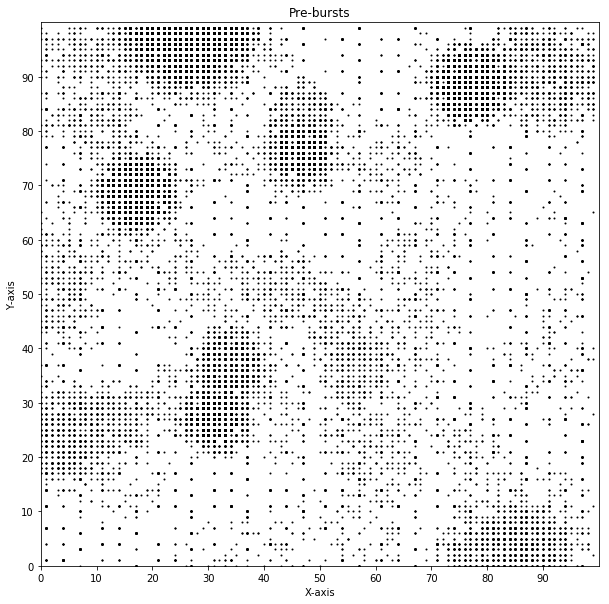

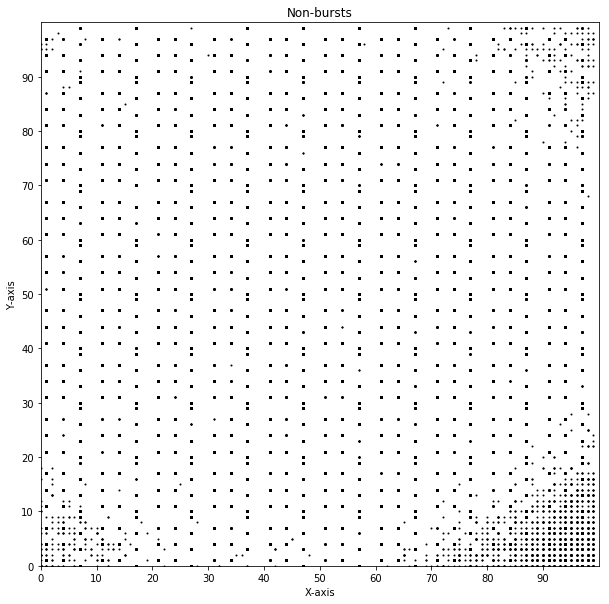

In [14]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

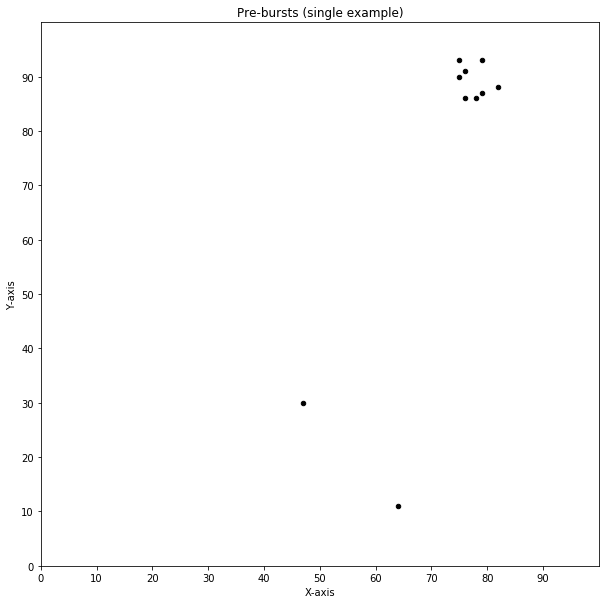

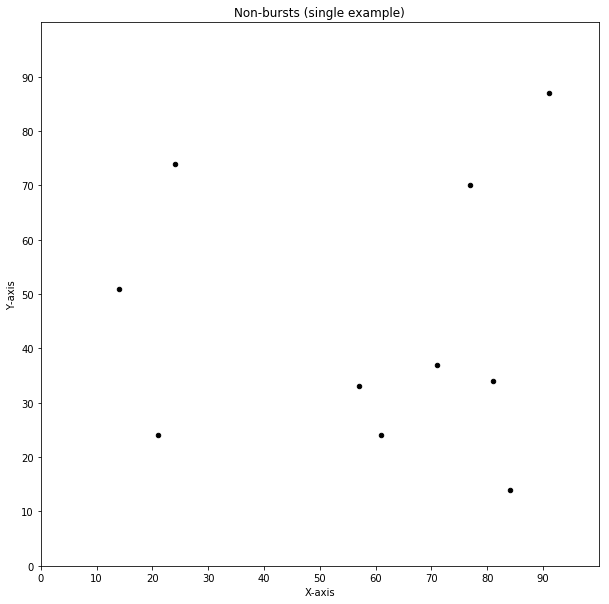

In [15]:
plot_single_scatter(pre_bursts, window_size, 'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size, 'Non-bursts (single example)', s=20)

Analyzing spike windows of size 50

Mean and standard deviation of the non-burst spike coordinates bounding box area: 8978.911234682319, 919.4911498295115
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 5327.533470648816, 2455.712206018252


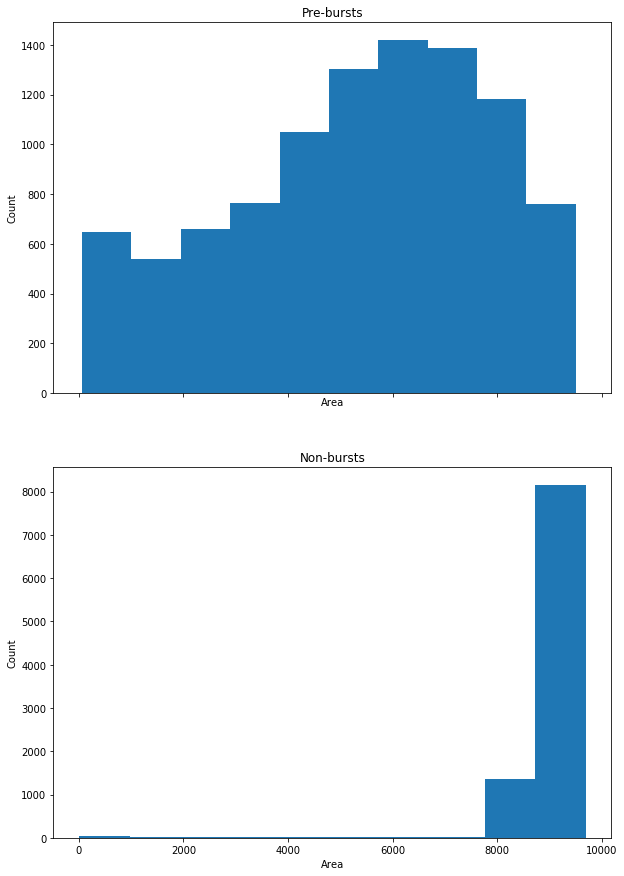

In [16]:
filename = 'train_data/space_50.csv'
window_size = get_window_size(filename)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' + str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' + str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

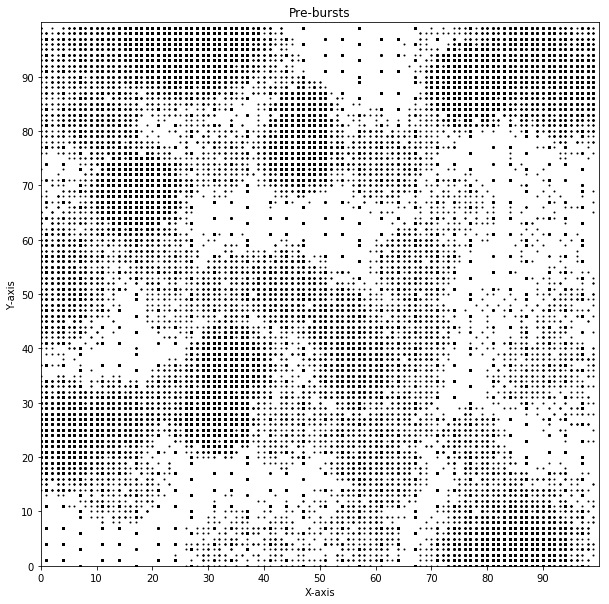

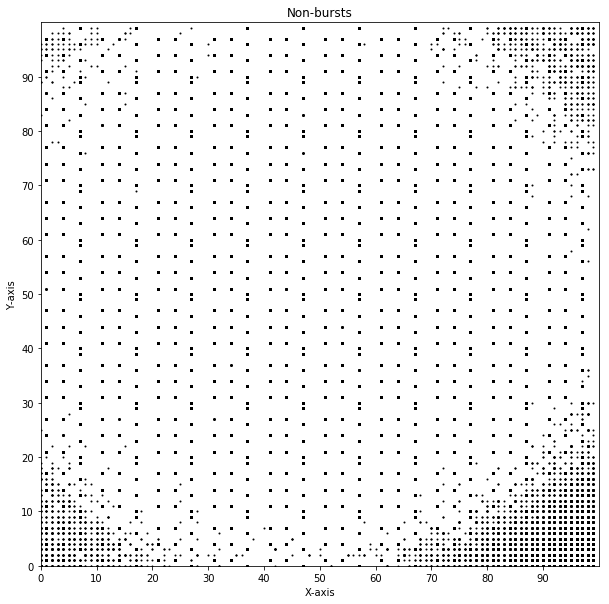

In [17]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

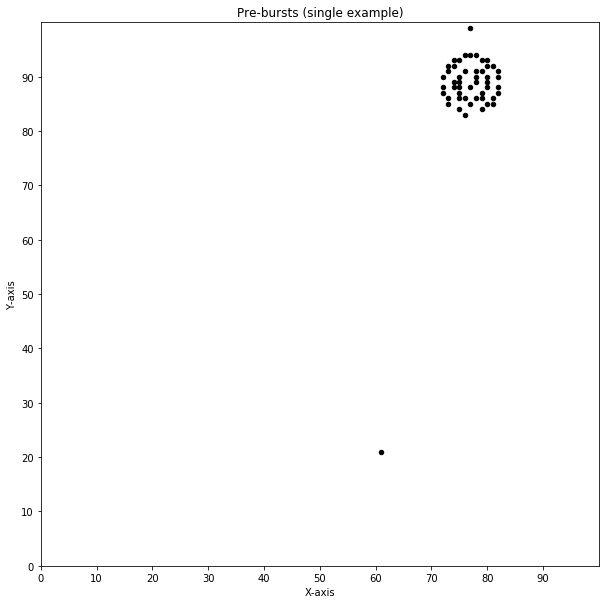

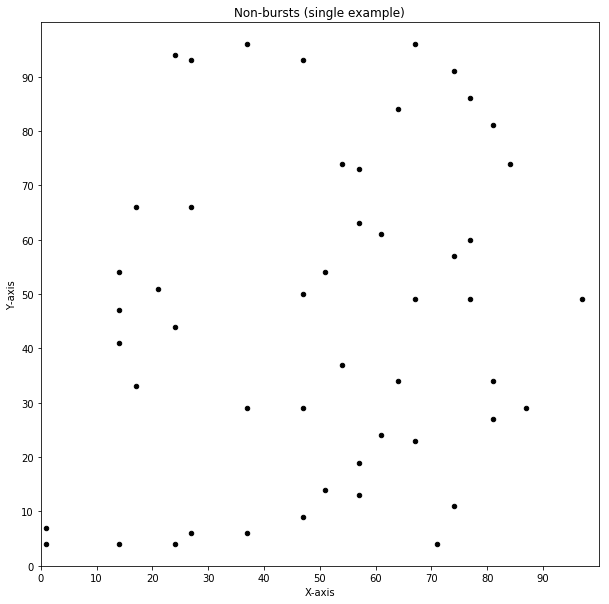

In [18]:
plot_single_scatter(pre_bursts, window_size, 'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size, 'Non-bursts (single example)', s=20)

Analyzing spike windows of size 100

Mean and standard deviation of the non-burst spike coordinates bounding box area: 9280.82905982906, 767.740033715656
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 7826.239031925849, 1829.6145421461983


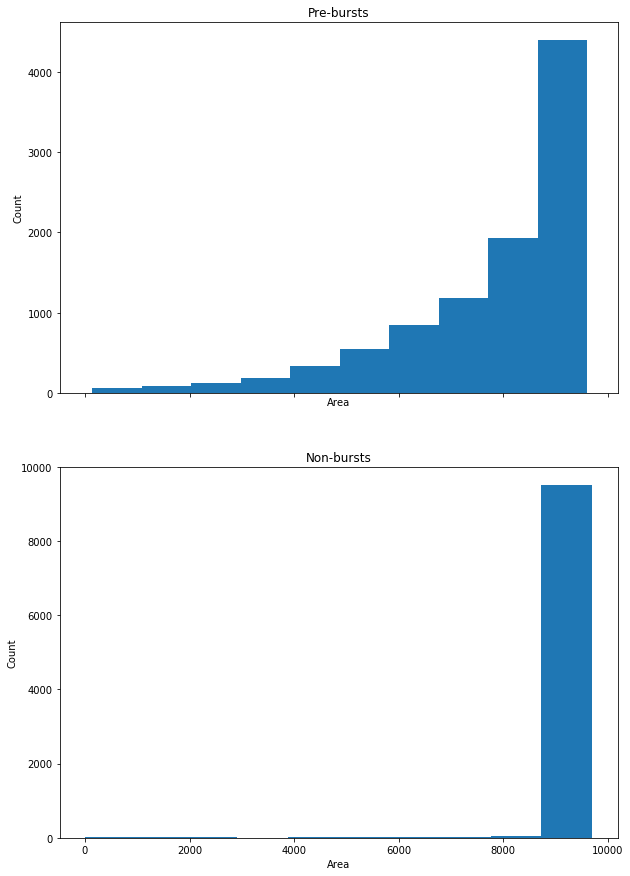

In [19]:
filename = 'train_data/space_100.csv'
window_size = get_window_size(filename)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' + str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' + str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

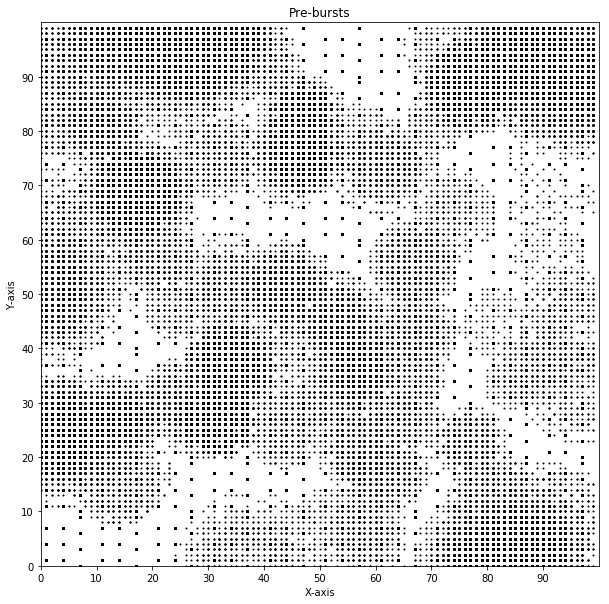

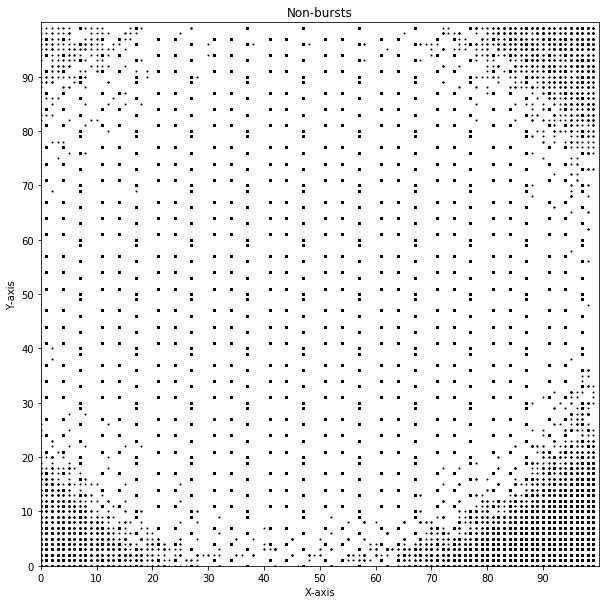

In [20]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

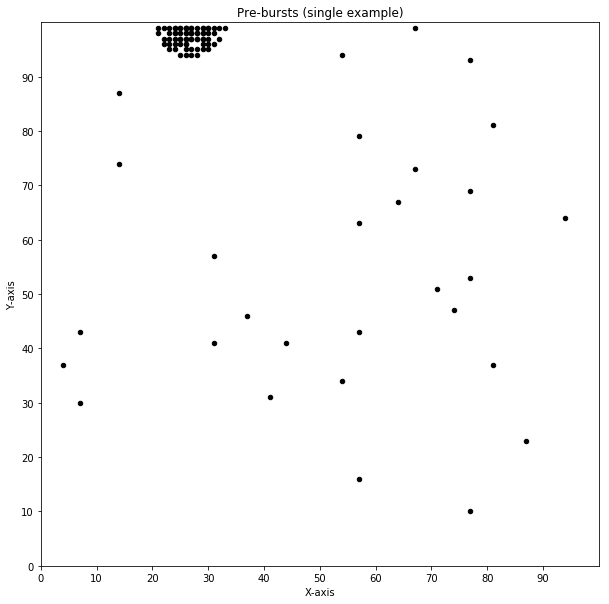

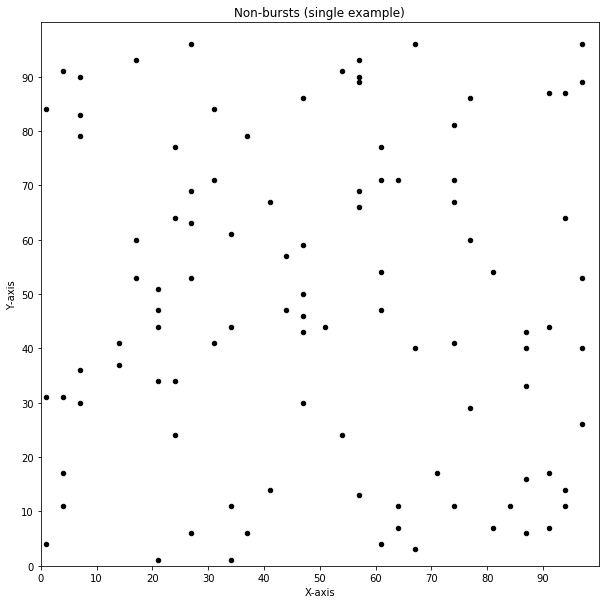

In [21]:
plot_single_scatter(pre_bursts, window_size, 'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size, 'Non-bursts (single example)', s=20)

Analyzing spike windows of size 500

Mean and standard deviation of the non-burst spike coordinates bounding box area: 9478.316136340232, 318.749616852126
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 9486.920803295572, 143.46552964911453


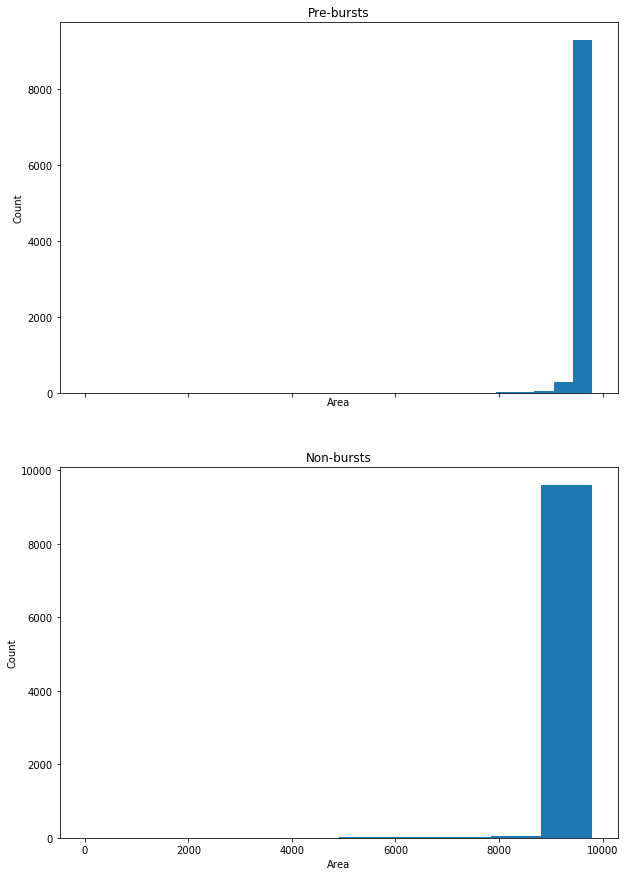

In [22]:
filename = 'train_data/space_500.csv'
window_size = get_window_size(filename)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' + str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' + str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

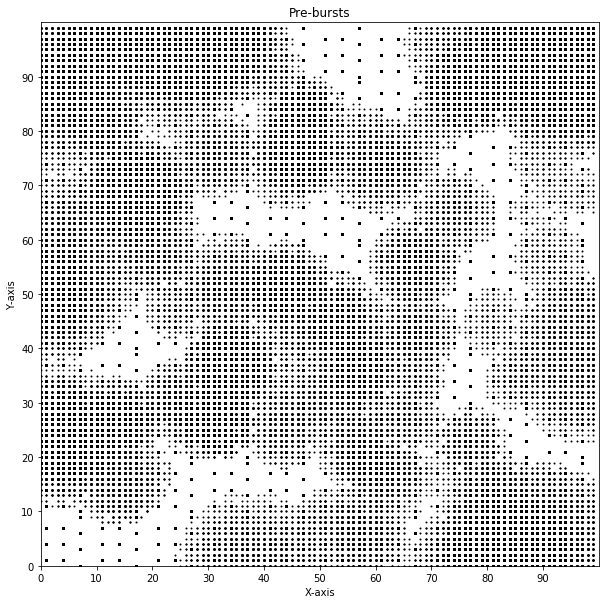

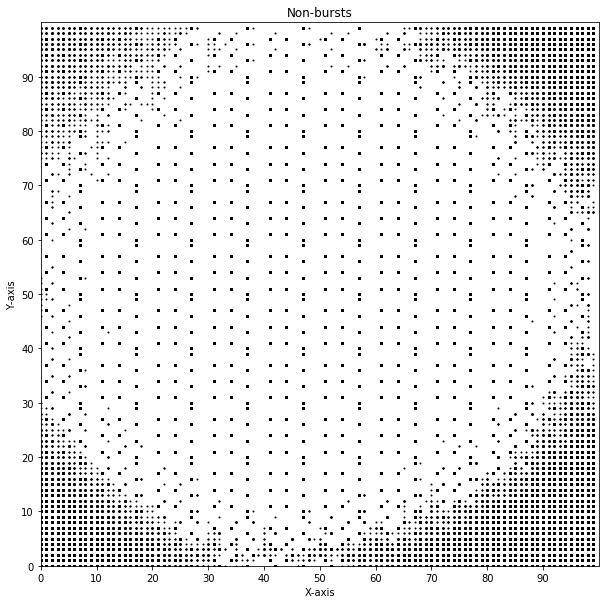

In [23]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

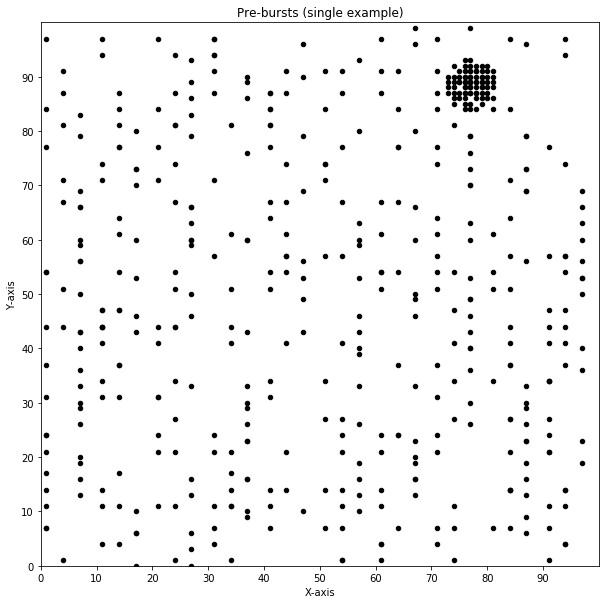

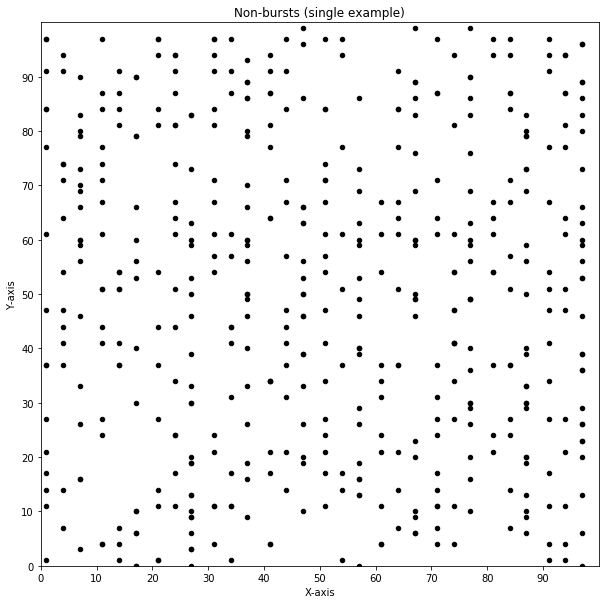

In [26]:
plot_single_scatter(pre_bursts, window_size, 'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size, 'Non-bursts (single example)', s=20)

It looks like during pre-burst mostly only the starter neurons spike. The pre-burst spike coordinates plots look very similar to the plot of starter neurons.

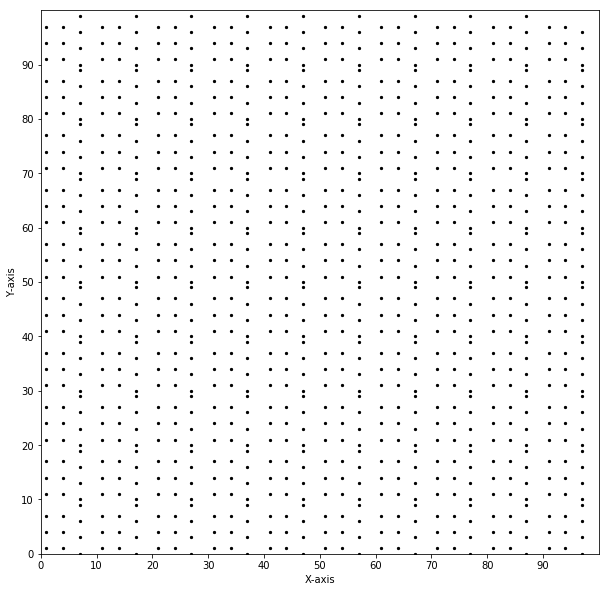

In [25]:
plot_starter_neurons()